In [ ]:
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer

sys.path.append(str(Path().resolve().parent))
from src.definitions import RAW_DATA_FOLDER

In [5]:
span_detection_tbl = pd.read_parquet(RAW_DATA_FOLDER / "techniques-classification.parquet")

span_detection_tbl.head(5)

,id,content,lang,manipulative,techniques,trigger_words
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,True,"[euphoria, loaded_language]",None
1,7159f802-6f99-4e9d-97bd-6f565a4a0fae,Недавно 95 квартал жёстко поглумился над русск...,ru,True,"[loaded_language, cherry_picking]",None
2,e6a427f1-211f-405f-bd8b-70798458d656,🤩\nТим часом йде евакуація Бєлгородського авто...,uk,True,"[loaded_language, euphoria]",None
3,1647a352-4cd3-40f6-bfa1-d87d42e34eea,В Україні найближчим часом мають намір посилит...,uk,False,None,None
4,9c01de00-841f-4b50-9407-104e9ffb03bf,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",ru,True,[loaded_language],None


In [4]:
df = span_detection_tbl[['content', 'techniques']]
df

,content,techniques
0,Новий огляд мапи DeepState від російського вій...,"[euphoria, loaded_language]"
1,Недавно 95 квартал жёстко поглумился над русск...,"[loaded_language, cherry_picking]"
2,🤩\nТим часом йде евакуація Бєлгородського авто...,"[loaded_language, euphoria]"
3,В Україні найближчим часом мають намір посилит...,None
4,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",[loaded_language]
...,...,...
3817,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,"[loaded_language, euphoria]"
3818,"К слову, Бабий не просто «ларечник», а и челов...",[loaded_language]
3819,"Глава ФСБ Бортников ответил журналистам, почем...",None
3820,В ДНР завозили наркотики в бытовой технике\nОб...,None


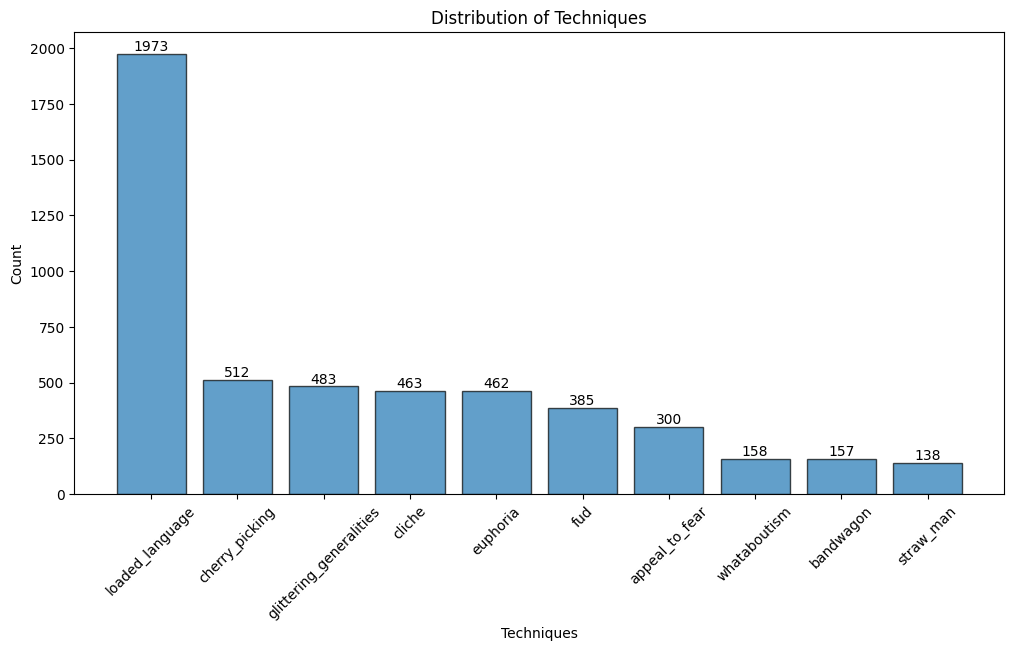

In [16]:
technique_counts = df['techniques'].explode().value_counts()

plt.figure(figsize=(12, 6))
plt.bar(technique_counts.index, technique_counts.values, edgecolor='k', alpha=0.7)
plt.title('Distribution of Techniques')
plt.xlabel('Techniques')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(technique_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

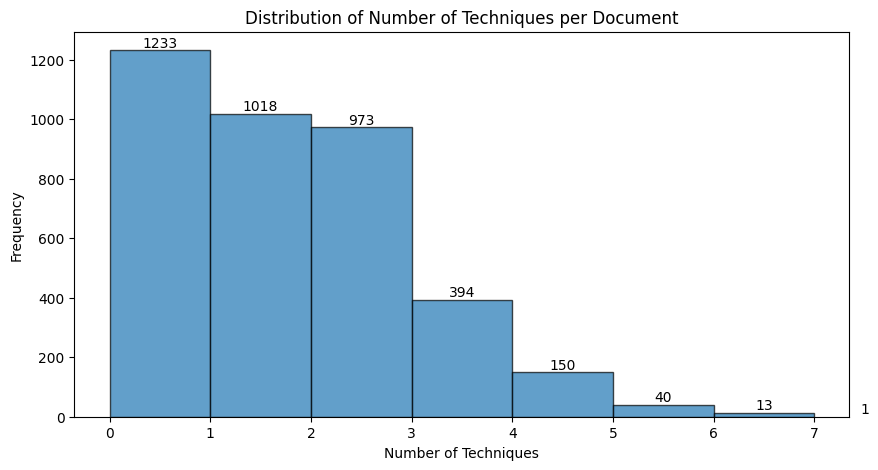

In [15]:
df.loc[:, 'techniques'] = df['techniques'].apply(lambda x: x if isinstance(x, list) else [])
df.loc[:, 'num_techniques'] = df['techniques'].str.len()

# Plot the distribution of the number of techniques
plt.figure(figsize=(10, 5))
plt.hist(df['num_techniques'], bins=df['num_techniques'].max(), edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Techniques per Document')
plt.xlabel('Number of Techniques')
plt.ylabel('Frequency')

num_technique_counts = df['num_techniques'].value_counts().sort_index()

# Annotate the histogram
for i, value in num_technique_counts.items():
    plt.text(i+0.5, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


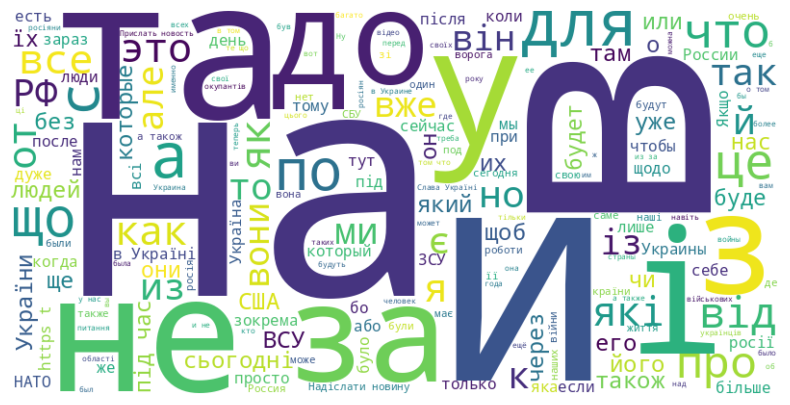

In [19]:
# Combine all content into a single string
text = ' '.join(df['content'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


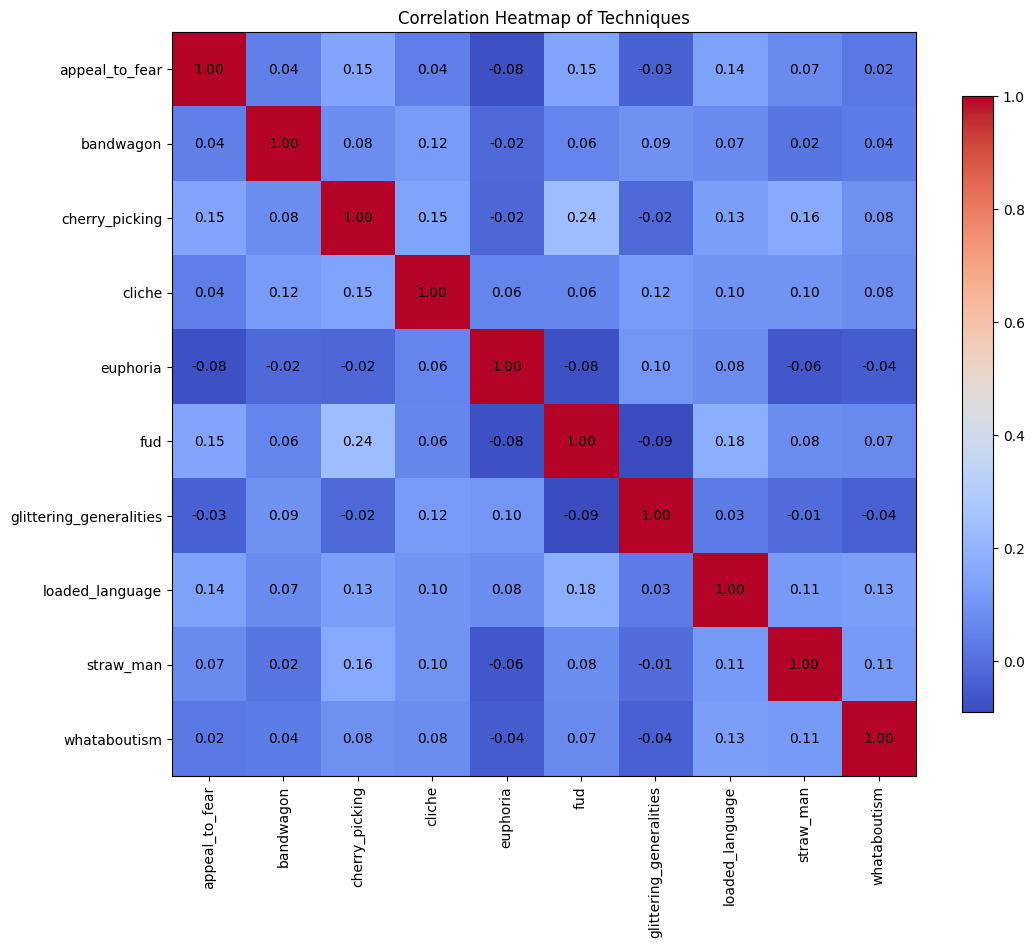

In [21]:
mlb = MultiLabelBinarizer()
technique_matrix = mlb.fit_transform(df['techniques'])

technique_df = pd.DataFrame(technique_matrix, columns=mlb.classes_)

correlation_matrix = technique_df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(shrink=0.8)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Techniques')

# Annotate the heatmap with correlation values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()
